# Binary search

1. Implement the code below for finding a randomly selected number on a given grid.
2. Run the illustration after completing the algorithm implementation

In [ ]:
def binary_search(grid=[0,1],val=0):
  '''Returns the index of val on the sorted grid
  example: 
  [1 4 7 8 10 56 129 4831092]
  say val = 7
  (its index is 2)
  
  // is integer division
  '''
  i1,i2 = 0,len(grid)-1
  if val==grid[i1]: return i1
  if val==grid[i2]: return i2
  j=(i1+i2)//2
  while grid[j]!=val:
    if val>grid[j]: 
      i1=j
    else: 
      i2=j
    j=(i1+i2)//2  # divide in half
  return j

In [ ]:
# Replace ??? with your code

def binary_search(grid=[0,1],val=0):
  '''Returns the index of val on the sorted grid
  '''
  i1,i2 = 0,len(grid)-1
  if val==grid[i1]: return ???
  if val==grid[i2]: return ???
  j=??? # divide in half
  while grid[j]!=val:
    if val>grid[j]: 
      ???=j
    else: 
      ???=j
    j=??? # divide in half
  return ???

In [6]:
import numpy as np
N = 10
# random sorted sequence of integers up to 100
x = np.random.choice(100,size=N,replace=False)
x = np.sort(x)
# random choice of one number/index
k0 = np.random.choice(N,size=1)
k1 = binary_search(grid=x,val=x[k0])
print(f'Index of x{k0}={x[k0]} in {x} is {k1}')

The following code illustrates how run-time grows with the length of the list.

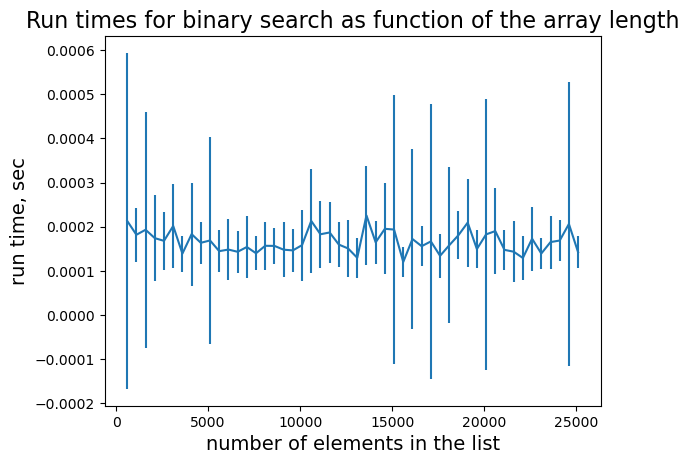

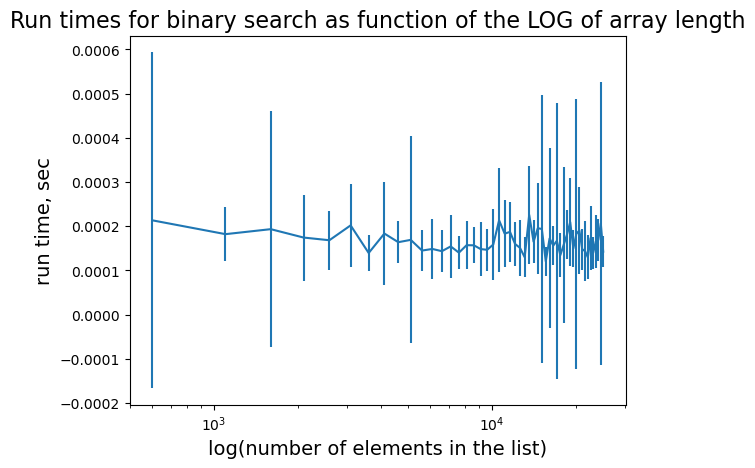

In [ ]:
import matplotlib.pyplot as plt

N = 50  # number of points
kk = lambda i: 100+(i+1)*1000  # step formula
# precompute the sorted sequence of integers of max length
vv = np.random.choice(10*kk(N),size=kk(N),replace=False)
vv = np.sort(vv)

n,x,std = [0]*N,[0]*N,[0]*N   # initialize lists
for i in range(N):
  n[i] = kk(i)  # number of list elements
  # randomize the choice in each run to smooth out simulation error
  t = %timeit -n10 -r100 -o -q binary_search(grid=vv[:n[i]],val=vv[np.random.choice(n[i],size=1)])
  x[i] = t.average
  std[i] = t.stdev

plt.errorbar(n,x,std)
plt.xlabel('number of elements in the list', fontsize=14)
plt.ylabel('run time, sec', fontsize=14)
plt.title("Run times for binary search as function of the array length",fontsize=16)
plt.show()

plt.errorbar(n,x,std)
plt.xscale('log')
plt.xlabel('log(number of elements in the list)', fontsize=14)
plt.ylabel('run time, sec', fontsize=14)
plt.title("Run times for binary search as function of the LOG of array length",fontsize=16)
plt.show()

# Bisections method for equation solving

Solve equations of the form (focus on scalar case today)

$$f(x) = 0, \quad x \in [a,b] \subset \mathbb{R}, \; f(a)f(b)<0$$

The latter condition requires that the function $f(x)$ takes different signs at the endpoints $a$ and $b$

Algorithm is similar to binary search, but in **continuous space**


Tasks to perform:
1. Implement the bisection method for finding roots of a continuous function
2. Run the example to demonstrate the work of the algorithm
3. Using the callback feature, display the relative errors on each iteration

In [ ]:
def bisection(f, a=0, b=1, tol=1e-6, maxiter=100, callback=None):
  '''Bisection method for solving equation f(x)=0
  on the interval [a,b], with given tolerance and number of iterations.
  Callback function is invoked at each iteration if given.
  '''
  pass        # your code here
  # somewhere inside the cycle you should have:
  # if callback != None: callback(err=err,x=x,iter=i)

In [8]:
def bisection(f,a=0,b=1,tol=1e-6,maxiter=100,callback=None):
    '''Bisection method for solving equation f(x)=0
    on the interval [a,b], with given tolerance and number of iterations.
    Callback function is invoked at each iteration if given.
    '''
    if f(a)*f(b)>0:
        raise ValueError('Function has the same sign at the bounds')
    for i in range(maxiter):
        err = abs(b-a)
        if err<tol: break
        x = (a+b)/2
        a,b = (x,b) if f(a)*f(x)>0 else (a,x)
        if callback != None: callback(err=err,x=x,iter=i)
    else:
        raise RuntimeError('Failed to converge in %d iterations'%maxiter)
    return x

In [9]:
f = lambda x: -4*x**3+5*x+1
a,b = -3,-.5  # upper and lower limits
x = bisection(f,a,b)
print('Solution is x=%1.3f, f(x)=%1.12f' % (x,f(x)))

Solution is x=-1.000, f(x)=0.000000834465


## Rate of convergence

- How fast does a solution method converge on the root of the equation?  
- Rate of convergence = the rate of decrease of the bias (difference between current guess and the solution)  
- Can be approximated by the rate of decrease of the error in the stopping criterion  

In [11]:
def print_err(iter,err,**kwargs):
    x = kwargs['x'] if 'x' in kwargs.keys() else kwargs['x0']
    print('{:4d}:  x = {:17.14f}  err = {:8.6e}'.format(iter,x,err))

print('Bisection method')
bisection(f,a=-3,b=-0.5,callback=print_err,tol=1e-12)

Bisection method
   0:  x = -1.75000000000000  err = 2.500000e+00
   1:  x = -1.12500000000000  err = 1.250000e+00
   2:  x = -0.81250000000000  err = 6.250000e-01
   3:  x = -0.96875000000000  err = 3.125000e-01
   4:  x = -1.04687500000000  err = 1.562500e-01
   5:  x = -1.00781250000000  err = 7.812500e-02
   6:  x = -0.98828125000000  err = 3.906250e-02
   7:  x = -0.99804687500000  err = 1.953125e-02
   8:  x = -1.00292968750000  err = 9.765625e-03
   9:  x = -1.00048828125000  err = 4.882812e-03
  10:  x = -0.99926757812500  err = 2.441406e-03
  11:  x = -0.99987792968750  err = 1.220703e-03
  12:  x = -1.00018310546875  err = 6.103516e-04
  13:  x = -1.00003051757812  err = 3.051758e-04
  14:  x = -0.99995422363281  err = 1.525879e-04
  15:  x = -0.99999237060547  err = 7.629395e-05
  16:  x = -1.00001144409180  err = 3.814697e-05
  17:  x = -1.00000190734863  err = 1.907349e-05
  18:  x = -0.99999713897705  err = 9.536743e-06
  19:  x = -0.99999952316284  err = 4.768372e-06
  2

-1.0000000000001137